In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='paper')


In [2]:
import os
os.listdir('data')

['10cc FACS results.xlsx',
 '10cc FL.xlsx',
 '10cc metadata.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 'CCPA.pkl.gz',
 'Growth curves A-D Yara.xlsx',
 'shading experiment',
 'Yara_pro99_axenic.xlsx']

In [3]:
from seaborn_figure_settings import * 

In [4]:
horder = [ 'HOT1A3', 'CIP', 'nitzsch', 'HOT5_F3','HOT5_C3', 'HP15', 'Pgall',]

In [5]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [6]:
gorder_full = [
'Strong',
 'Strong',
# 'Sustained',
 'Sustained',
 'Weak',
 'Weak',
 'Inhibited',
 'Inhibited',
]

gpalette_dict = dict(zip(gorder, gpalette))
hpalette_tree = [gpalette_dict[i] for i in gorder_tree]
hpalette_g = [gpalette_dict[i] for i in gorder_full]
sns.color_palette(hpalette_g)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [7]:
exdata =  pd.read_excel(os.path.join('data','shading experiment','10CC_shading_230302025.xlsx'), sheet_name=None)

In [8]:
exdata.keys()

dict_keys(['het growth', 'FL', 'stats', 'Sheet2', 'HET concentrations', 'experiment plan', 'starter FCM', 'Final FCM'])

In [9]:
df_fl = exdata['FL']
df_setup = exdata['HET concentrations']
df_facs_starter = exdata['starter FCM']
df_facs_final = exdata['Final FCM']


In [10]:
df_fl['reference_baseline_FL'] = df_fl['baseline']
mdf_fl = df_fl.melt(id_vars=['id','name', 'reference_baseline_FL'], value_name='FL', var_name='Treatment')

In [11]:
mdf_fl['Relative FL'] = mdf_fl['FL'].div(mdf_fl['reference_baseline_FL'])

In [12]:
df_setup

,id,bacteria,baseline,add 0.04 ml,add 0.4 ml,add 4 ml
0,NaN,NaN,NaN,4.000000e-02,4.000000e-01,4.000000e+00
1,1.0,Axenic,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.0,HOT1A3,9.257800e+08,1.847864e+06,2.002671e+07,1.695736e+08
3,3.0,HP15,4.358200e+08,8.699002e+05,9.427768e+06,7.982842e+07
4,4.0,Pgall,2.984500e+08,5.957086e+05,6.456146e+06,5.466658e+07
5,5.0,CIP,4.348500e+08,8.679641e+05,9.406785e+06,7.965074e+07
6,7.0,nitzsch,2.007690e+09,4.007365e+06,4.343086e+07,3.677452e+08
7,10.0,HOT5_F3,2.005460e+09,4.002914e+06,4.338262e+07,3.673367e+08
8,11.0,HOT5_C3,4.445600e+08,8.873453e+05,9.616834e+06,8.142931e+07


In [13]:
df_setup['baseline'] = 0
mdf_setup = df_setup.dropna().melt(id_vars=['id','bacteria'], value_name='HET concentration', var_name='Treatment')

In [14]:
df_facs_starter1 = df_facs_starter.dropna(subset='experiment ID').groupby('experiment ID')['MED4 cell/ml'].mean().reset_index()

In [15]:
df_facs_starter1.rename(columns={'MED4 cell/ml':'baseline'}, inplace=True)
df_facs_starter1['reference_baseline_MED4_FCM'] = df_facs_starter1['baseline'] 


In [16]:
starter_vol_baseline = 20
starter_vol_004 = 20+0.04
starter_vol_04 = starter_vol_004 -0.1 + 0.4
starter_vol_4 = starter_vol_04 -0.1 + 4

percent_med4_after_facs_sample_004 = 1
percent_med4_after_facs_sample_04 = (starter_vol_004 -0.1)/ starter_vol_004
percent_med4_after_facs_sample_4 = (starter_vol_04 -0.1)/ starter_vol_04

med4_loss_ratio_004 = starter_vol_baseline / starter_vol_004  
med4_loss_ratio_04 = med4_loss_ratio_004 * (starter_vol_004 / starter_vol_04)
med4_loss_ratio_4 = med4_loss_ratio_04 * (starter_vol_04 / starter_vol_4)

med4_loss_ratio_004 , med4_loss_ratio_04 , med4_loss_ratio_4 


(0.9980039920159681, 0.9832841691248773, 0.8250825082508253)

In [17]:
df_facs_starter1['add 0.04 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_004
df_facs_starter1['add 0.4 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_04
df_facs_starter1['add 4 ml'] = df_facs_starter1['baseline'] * med4_loss_ratio_4



In [18]:
df_facs_final['Treatment'] = df_facs_final['Unnamed: 3'].map({
    '10^6': 'add 0.04 ml',
    '10^7': 'add 0.4 ml',
    '10^8': 'add 4 ml',
    
})

df_facs_final.rename(columns={
    'sample': 'id',
    'MED4' : 'observed_MED4_concentration',
}, inplace=True)

In [19]:
df_facs_final1 = df_facs_final[[ 'id', 'Treatment',  'observed_MED4_concentration','All', ]].melt(id_vars=['id', 'Treatment',], value_name='cell/ml', var_name='Strain').dropna()

In [20]:
df_facs_final2 = df_facs_final1.pivot_table(index=['id','Treatment'], columns='Strain')#.reset_index()
df_facs_final2.columns = df_facs_final2.columns.droplevel()
df_facs_final2 = df_facs_final2.reset_index()
df_facs_final2['observed_HET_concentration'] = df_facs_final2['All'] - df_facs_final2['observed_MED4_concentration']

In [21]:
df_facs_final2


Strain,id,Treatment,All,observed_MED4_concentration,observed_HET_concentration
0,2,add 0.04 ml,298100000.0,260440000.0,37660000.0
1,2,add 0.4 ml,359200000.0,270620000.0,88580000.0
2,2,add 4 ml,590040000.0,218680000.0,371360000.0
3,3,add 0.04 ml,180100000.0,186880000.0,-6780000.0
4,3,add 0.4 ml,291320000.0,237120000.0,54200000.0
5,3,add 4 ml,682460000.0,150180000.0,532280000.0
6,4,add 0.04 ml,259560000.0,527400000.0,-267840000.0
7,4,add 0.4 ml,311800000.0,460000.0,311340000.0
8,4,add 4 ml,259020000.0,231520000.0,27500000.0
9,5,add 0.04 ml,177180000.0,179920000.0,-2740000.0


In [22]:
mdf_facs_starter = df_facs_starter1.melt(
    id_vars=['experiment ID', 'reference_baseline_MED4_FCM'], 
    value_vars=['baseline','add 0.04 ml', 'add 0.4 ml', 'add 4 ml'], 
    value_name='MED4 concentration', 
    var_name='Treatment'
)

In [23]:
mdf_facs_starter['Relative MED4 concentration'] = mdf_facs_starter['Treatment'].map({
    #'baseline':1
    'add 0.04 ml' :  med4_loss_ratio_004,
    'add 0.4 ml': med4_loss_ratio_04,
    'add 4 ml':  med4_loss_ratio_4,
})

In [24]:
mdf_facs_starter.columns, mdf_setup.columns, mdf_fl.columns, df_facs_final2.columns

(Index(['experiment ID', 'reference_baseline_MED4_FCM', 'Treatment',
        'MED4 concentration', 'Relative MED4 concentration'],
       dtype='object'),
 Index(['id', 'bacteria', 'Treatment', 'HET concentration'], dtype='object'),
 Index(['id', 'name', 'reference_baseline_FL', 'Treatment', 'FL',
        'Relative FL'],
       dtype='object'),
 Index(['id', 'Treatment', 'All', 'observed_MED4_concentration',
        'observed_HET_concentration'],
       dtype='object', name='Strain'))

In [51]:
df1 = pd.merge(mdf_facs_starter, mdf_setup, left_on=['experiment ID', 'Treatment'], right_on=['id','Treatment'], how='left' )
df2 = pd.merge(df1, mdf_fl, on=['id', 'Treatment'], how='left')
df3 = pd.merge(df2, df_facs_final2, on=['id', 'Treatment'], how='left')
df= df3 
df

,experiment ID,reference_baseline_MED4_FCM,Treatment,MED4 concentration,Relative MED4 concentration,id,bacteria,HET concentration,name,reference_baseline_FL,FL,Relative FL,All,observed_MED4_concentration,observed_HET_concentration
0,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.032,7.032,1.000000,NaN,NaN,NaN
1,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.010,7.010,1.000000,NaN,NaN,NaN
2,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.168,7.168,1.000000,NaN,NaN,NaN
3,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.090,7.090,1.000000,NaN,NaN,NaN
4,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,6.897,6.897,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.979,1.471,0.210775,855680000.0,236220000.0,619460000.0
156,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,7.067,1.519,0.214943,855680000.0,236220000.0,619460000.0
157,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.853,1.508,0.220050,855680000.0,236220000.0,619460000.0
158,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.860,1.584,0.230904,855680000.0,236220000.0,619460000.0


In [52]:
df.bacteria.unique()

array(['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'nitzsch', 'HOT5_F3',
       'HOT5_C3'], dtype=object)

In [53]:
df['group'] = 'Add HET'
df.loc[df.bacteria.isin(['Axenic']), 'group'] = 'ctrl'

In [54]:
df.group.unique()

array(['ctrl', 'Add HET'], dtype=object)

In [55]:
df.bacteria.unique()

array(['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'nitzsch', 'HOT5_F3',
       'HOT5_C3'], dtype=object)

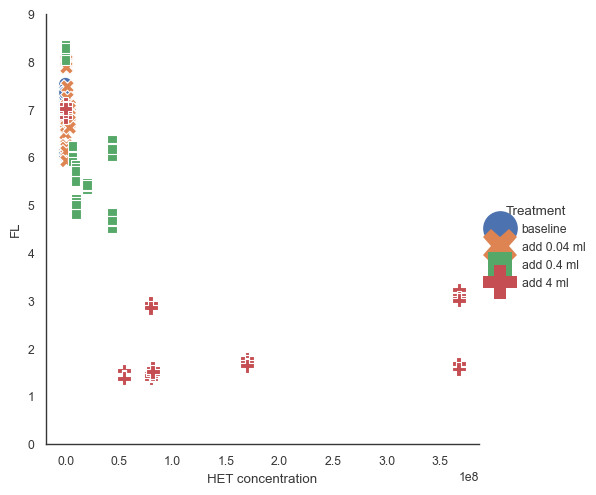

In [56]:
sns.relplot(
    data=df,
    #size='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='Treatment',
    x='HET concentration',
    s=100,
    sizes=(30,300),
).set(ylim=(0,9)) #, xlim=(-1e7,2e8))
    


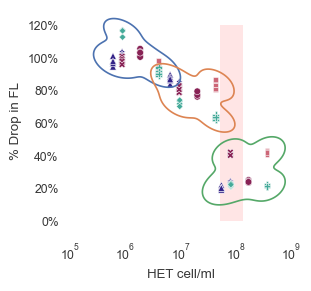

In [57]:
g = sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='Relative FL',
    hue='Treatment',
    x='HET concentration',
    log_scale=(True, False), kind='kde',
    levels=2,
    height=3,
    legend=False
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='Relative FL',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='HET concentration',
    legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
plt.fill_betweenx([0,1.2], 5.133843e+07, 1.376131e+08,
                facecolor='red', alpha=0.1, zorder=-1)
g.set(
      xlim=(1e5,1e9), 
      
       ylabel='% Drop in FL', xlabel='HET cell/ml')



plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))


In [79]:
df.columns

Index(['experiment ID', 'reference_baseline_MED4_FCM', 'Treatment',
       'MED4 concentration', 'Relative MED4 concentration', 'id', 'bacteria',
       'HET concentration', 'name', 'reference_baseline_FL', 'FL',
       'Relative FL', 'All', 'observed_MED4_concentration',
       'observed_HET_concentration', 'group', 'HET concentration binned',
       'HET concentration binned 2'],
      dtype='object')

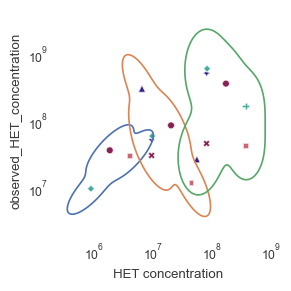

In [81]:
g = sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='observed_HET_concentration',
    hue='Treatment',
    x='HET concentration',
    log_scale=(True, True), kind='kde',
    levels=2,
    height=3,
    legend=False
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='observed_HET_concentration',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='HET concentration',
    legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')





In [105]:
df.describe().T[['min','max']]

,min,max
experiment ID,1.000000e+00,1.100000e+01
reference_baseline_MED4_FCM,1.687200e+08,2.714100e+08
MED4 concentration,1.392079e+08,2.714100e+08
Relative MED4 concentration,8.250825e-01,9.980040e-01
id,1.000000e+00,1.100000e+01
HET concentration,0.000000e+00,3.677452e+08
reference_baseline_FL,6.024000e+00,7.527000e+00
FL,1.362000e+00,8.353000e+00
Relative FL,1.919662e-01,1.200957e+00
All,1.771800e+08,8.556800e+08


In [167]:
df['Total cell/ml'] = df['HET concentration'] + df['MED4 concentration']
df['MED4 concentration error'] = (df['observed_MED4_concentration']-df['MED4 concentration']).div(df['MED4 concentration'])

In [168]:
df.groupby('bacteria')['MED4 concentration error'].describe()[['mean','std']]

,mean,std
bacteria,,
Axenic,NaN,NaN
CIP,0.096616,0.179206
HOT1A3,0.183943,0.027515
HOT5_C3,0.165996,0.040663
HOT5_F3,0.226251,0.166718
HP15,0.205988,0.163971
Pgall,0.100765,0.910721
nitzsch,0.081597,0.163171


In [169]:
df.loc[~df.bacteria.isin(['Pgall'])].drop_duplicates(subset=['id','Treatment']).describe().T[['mean','std']]

,mean,std
experiment ID,5.571429e+00,3.686096e+00
reference_baseline_MED4_FCM,2.242686e+08,3.431063e+07
MED4 concentration,2.134123e+08,3.678009e+07
Relative MED4 concentration,9.354569e-01,8.021055e-02
id,5.571429e+00,3.686096e+00
HET concentration,4.619067e+07,9.869751e+07
reference_baseline_FL,6.988286e+00,4.371049e-01
FL,5.578536e+00,2.077104e+00
Relative FL,7.986117e-01,2.953390e-01
All,3.619267e+08,1.776539e+08


In [171]:
df['MED4 concentration error'].describe()[['mean','std']]

mean    0.151594
std     0.360793
Name: MED4 concentration error, dtype: float64

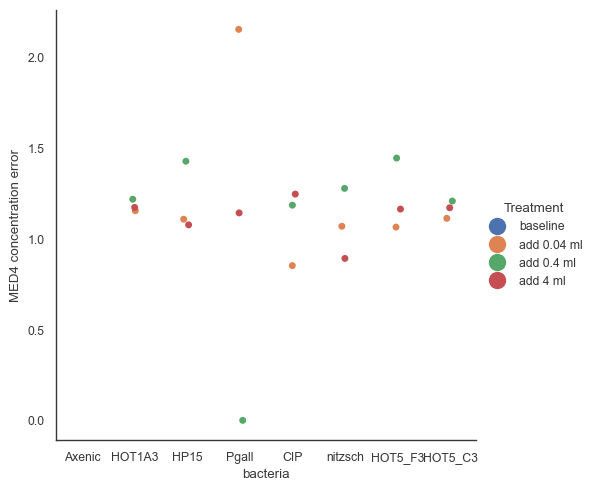

In [161]:
sns.catplot(
    data=df.drop_duplicates(subset=['id','Treatment']),
    y='MED4 concentration error',
    x='bacteria',
    hue='Treatment',
)

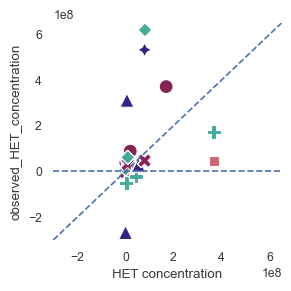

In [107]:
vmin = -3e8
vmax=6.5e8
g = sns.relplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='observed_HET_concentration',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='HET concentration',
    legend=False,
    height=3, aspect=1,
    s=100,
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
g.set(ylim=(vmin, vmax), xlim=(vmin, vmax)) 

import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')


plt.axline((0,0), (1,1), ls='--')
plt.axhline(0, ls='--')



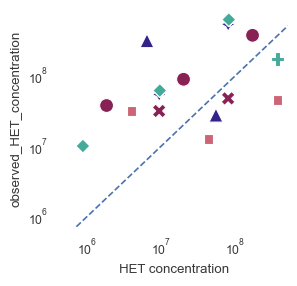

In [110]:
vmin = -3e8
vmax=6.5e8
g = sns.relplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='observed_HET_concentration',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='HET concentration',
    legend=False,
    height=3, aspect=1,
    s=100,
) 
g.set(xscale='log', yscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
#g.set(ylim=(vmin, vmax), xlim=(vmin, vmax)) 

import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')


plt.axline((1e6,1e6), (1e7,1e7), ls='--')
#plt.axhline(0, ls='--')



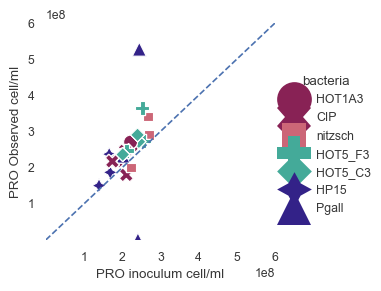

In [170]:
vmin=1
vmax=6e8
g = sns.relplot(
    data=df, #.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='observed_MED4_concentration',
    #hue='Treatment',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='MED4 concentration',
    #legend=False,
    height=3, aspect=1,
    s=100,
)
#g.set(xscale='log') 
g.set(ylim=(vmin, vmax), xlim=(vmin, vmax)) 
g.set(ylabel='PRO Observed cell/ml')
g.set(xlabel='PRO inoculum cell/ml')

import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
plt.axline((0,0), (1,1), ls='--')
# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')





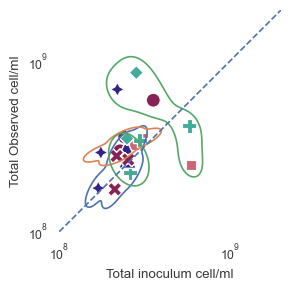

In [149]:
vmin=1e8
vmax=2e9
g = sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='All',
    hue='Treatment',
    x='Total cell/ml',
    log_scale=(True, True), 
    kind='kde',
    levels=2,
    height=3,
    legend=False
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.scatterplot(
    data=df, #.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='All',
    #hue='Treatment',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='Total cell/ml',
    legend=False,
    #height=3, aspect=1,
    s=100,
)
#g.set(xscale='log', yscale='log') 
g.set(ylim=(vmin, vmax), xlim=(vmin, vmax)) 
g.set(ylabel='Total Observed cell/ml')
g.set(xlabel='Total inoculum cell/ml')

import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
#plt.axline((0,0), (1,1), ls='--')
plt.axline((vmin,vmin), (vmax, vmax), ls='--')

# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')





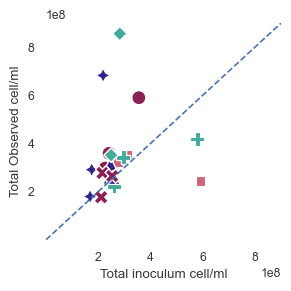

In [150]:
vmin=2
vmax=9e8
g = sns.relplot(
    data=df, #.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='All',
    hue='bacteria',    
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='Total cell/ml',
    legend=False,
    height=3, aspect=1,
    s=100,
)
#g.set(xscale='log', yscale='log') 
g.set(ylim=(vmin, vmax), xlim=(vmin, vmax)) 
g.set(ylabel='Total Observed cell/ml')
g.set(xlabel='Total inoculum cell/ml')

import matplotlib.ticker as mtick
sns.despine(bottom=True, left=True)
plt.axline((vmin,vmin), (vmax, vmax), ls='--')
# g.set(
#       xlim=(1e5,1e9), 
      
#        ylabel='% Drop in FL', xlabel='HET cell/ml')





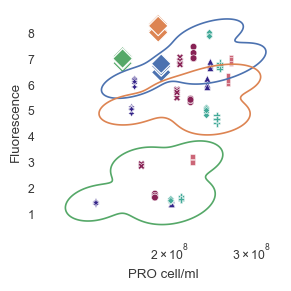

In [58]:
g = sns.displot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    x='MED4 concentration',
    log_scale=(True, False), kind='kde', levels=2,
    height=3,
    legend=False,
)# .set(xlim=(1e2,1e9))

sns.scatterplot(
    data=df.loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='bacteria',
    hue_order=horder, palette=hpalette_g ,
    style='bacteria', style_order=horder,
    x='MED4 concentration',
    legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.scatterplot(
    data=df.loc[df['group'].isin(['ctrl']) & ~df['Treatment'].isin(['baseline'])].reset_index(),
    #size='MED4 concentration',
    y='FL',
    hue='Treatment',
    style='group', markers=['D'], s=100,
    x='MED4 concentration', legend=False,
    #log_scale=(True, False), kind='kde',
) # .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.despine(bottom=True, left=True)
g.set(       ylabel='Fluorescence', xlabel='PRO cell/ml')


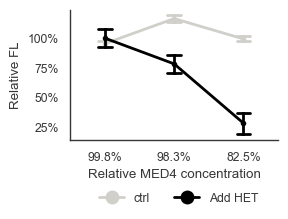

In [61]:

g = sns.catplot(
    data=df, # .loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='Relative FL',
    hue='group',
    x='Relative MED4 concentration',
    palette=[gpalette_dict['Other'], 'black'],
    orient='x',
    kind='point', formatter=lambda x: f"{x:.1%}",
    #col='Treatment', sharex=False, col_order=['add 0.04 ml', 'add 0.4 ml', 'add 4 ml', ],
    height=2, aspect=1.5,
    errorbar="sd", lw=2,
    markersize=4, markeredgewidth=0,capsize=.2,
).set_titles(col_template='{col_name}') 
g.set(xlabel='Relative MED4 concentration', ylabel='Relative FL')
# .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_inverted(True)  # inverted axis with autoscaling
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.1), ncol=2, title=None, frameon=False,markerscale=1
)

In [62]:
df

,experiment ID,reference_baseline_MED4_FCM,Treatment,MED4 concentration,Relative MED4 concentration,id,bacteria,HET concentration,name,reference_baseline_FL,FL,Relative FL,All,observed_MED4_concentration,observed_HET_concentration,group
0,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.032,7.032,1.000000,NaN,NaN,NaN,ctrl
1,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.010,7.010,1.000000,NaN,NaN,NaN,ctrl
2,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.168,7.168,1.000000,NaN,NaN,NaN,ctrl
3,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,7.090,7.090,1.000000,NaN,NaN,NaN,ctrl
4,1.0,192380000.0,baseline,1.923800e+08,NaN,1.0,Axenic,0.000000e+00,axenic,6.897,6.897,1.000000,NaN,NaN,NaN,ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.979,1.471,0.210775,855680000.0,236220000.0,619460000.0,Add HET
156,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,7.067,1.519,0.214943,855680000.0,236220000.0,619460000.0,Add HET
157,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.853,1.508,0.220050,855680000.0,236220000.0,619460000.0,Add HET
158,11.0,244060000.0,add 4 ml,2.013696e+08,0.825083,11.0,HOT5_C3,8.142931e+07,5c3,6.860,1.584,0.230904,855680000.0,236220000.0,619460000.0,Add HET


In [63]:
df.loc[df['HET concentration'].gt(0)]['HET concentration'].describe()
bins = [-1,1e5, 1e6, 5e6,1e7,5e7,1e8,5e8]
labels=['0', '1e5\n1e6', '1e6\n5e6', '5e6\n1e7', '1e7\n5e7', '5e7\n1e8', '1e8\n5e8' ]
df['HET concentration binned'] = pd.cut(df['HET concentration'],bins, labels=labels)

In [64]:
df.loc[df['HET concentration'].gt(0)]['HET concentration'].describe()
bins = [-1,1e5, 5e6,5e7,5e8]
labels=['0', '1e5\n5e6', '5e6\n5e7', '5e7\n5e8' ]
df['HET concentration binned 2'] = pd.cut(df['HET concentration'],bins, labels=labels)

In [65]:
df['HET concentration binned 2'].value_counts()

HET concentration binned 2
0           55
1e5\n5e6    35
5e6\n5e7    35
5e7\n5e8    35
Name: count, dtype: int64

In [67]:
df.groupby(['HET concentration binned'])['Relative FL'].describe().T

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_26436\2955494500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['HET concentration binned'])['Relative FL'].describe().T


HET concentration binned,0,1e5\n1e6,1e6\n5e6,5e6\n1e7,1e7\n5e7,5e7\n1e8,1e8\n5e8
count,55.000000,20.000000,15.000000,20.000000,15.000000,20.000000,15.000000
mean,1.010384,1.029453,0.961745,0.807555,0.747769,0.267638,0.293883
std,0.052818,0.076243,0.054476,0.058083,0.089779,0.085751,0.095511
min,0.922213,0.945595,0.891590,0.702187,0.619610,0.191966,0.210712
25%,1.000000,0.975953,0.920867,0.774388,0.643764,0.213901,0.223311
50%,1.000000,1.003701,0.942690,0.821469,0.771957,0.228773,0.240100
75%,1.000000,1.060029,1.009140,0.845630,0.808462,0.285289,0.414720
max,1.200957,1.169971,1.055493,0.897768,0.867472,0.422458,0.434806


In [69]:
df.groupby(['HET concentration binned 2'])['Relative FL'].describe().T

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_26436\2324564765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['HET concentration binned 2'])['Relative FL'].describe().T


HET concentration binned 2,0,1e5\n5e6,5e6\n5e7,5e7\n5e8
count,55.000000,35.000000,35.000000,35.000000
mean,1.010384,1.000435,0.781933,0.278886
std,0.052818,0.075008,0.078137,0.089661
min,0.922213,0.891590,0.619610,0.191966
25%,1.000000,0.950012,0.737647,0.217342
50%,1.000000,0.983294,0.806360,0.234722
75%,1.000000,1.027001,0.835696,0.404752
max,1.200957,1.169971,0.897768,0.434806


In [70]:
df.groupby(['Treatment', 'group'])['Relative FL'].describe().T

Treatment add 0.04 ml           add 0.4 ml             add 4 ml            \
group         Add HET      ctrl    Add HET      ctrl    Add HET      ctrl   
count       35.000000  5.000000  35.000000  5.000000  35.000000  5.000000   
mean         1.000435  0.954098   0.781933  1.166439   0.278886  0.993685   
std          0.075008  0.025352   0.078137  0.026806   0.089661  0.021718   
min          0.891590  0.922213   0.619610  1.132581   0.191966  0.972238   
25%          0.950012  0.937919   0.737647  1.150313   0.217342  0.972838   
50%          0.983294  0.958345   0.806360  1.165318   0.234722  0.991678   
75%          1.027001  0.963470   0.835696  1.183024   0.404752  1.013980   
max          1.169971  0.988546   0.897768  1.200957   0.434806  1.017689   

Treatment baseline       
group      Add HET ctrl  
count         35.0  5.0  
mean           1.0  1.0  
std            0.0  0.0  
min            1.0  1.0  
25%            1.0  1.0  
50%            1.0  1.0  
75%            1.0  1.0  
max            1.0  1.0

In [71]:
df.groupby(['HET concentration binned 2', 'Treatment'])['MED4 concentration'].describe().T

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_26436\4096571473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['HET concentration binned 2', 'Treatment'])['MED4 concentration'].describe().T


HET concentration binned 2             0                              \
Treatment                    add 0.04 ml    add 0.4 ml      add 4 ml   
count                       5.000000e+00  5.000000e+00  5.000000e+00   
mean                        1.919960e+08  1.891642e+08  1.587294e+08   
std                         0.000000e+00  0.000000e+00  0.000000e+00   
min                         1.919960e+08  1.891642e+08  1.587294e+08   
25%                         1.919960e+08  1.891642e+08  1.587294e+08   
50%                         1.919960e+08  1.891642e+08  1.587294e+08   
75%                         1.919960e+08  1.891642e+08  1.587294e+08   
max                         1.919960e+08  1.891642e+08  1.587294e+08   

HET concentration binned 2                    1e5\n5e6      5e6\n5e7  \
Treatment                       baseline   add 0.04 ml    add 0.4 ml   
count                       4.000000e+01  3.500000e+01  3.500000e+01   
mean                        2.268775e+08  2.313430e+08  2.279309e+08   
std                         3.267437e+07  3.194554e+07  3.147437e+07   
min                         1.687200e+08  1.683832e+08  1.658997e+08   
25%                         2.063600e+08  2.105988e+08  2.074926e+08   
50%                         2.348200e+08  2.435729e+08  2.399803e+08   
75%                         2.480325e+08  2.561976e+08  2.524189e+08   
max                         2.714100e+08  2.708683e+08  2.668732e+08   

HET concentration binned 2      5e7\n5e8  
Treatment                       add 4 ml  
count                       3.500000e+01  
mean                        1.912588e+08  
std                         2.641042e+07  
min                         1.392079e+08  
25%                         1.741089e+08  
50%                         2.013696e+08  
75%                         2.118069e+08  
max                         2.239356e+08

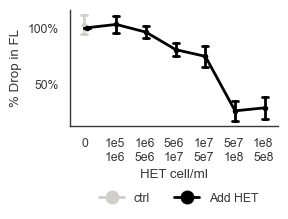

In [72]:

g = sns.catplot(
    data=df, # .loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='Relative FL',
    hue='group',
    x='HET concentration binned',
    palette=[gpalette_dict['Other'], 'black'],
    orient='x',
    kind='point', 
    #col='Treatment', sharex=False, col_order=['add 0.04 ml', 'add 0.4 ml', 'add 4 ml', ],
    height=2, aspect=1.5,
    errorbar="sd",dodge=0.1, lw=2,
    markersize=4, markeredgewidth=0,capsize=.2,
).set_titles(col_template='{col_name}') 
g.set(xlabel='HET cell/ml', ylabel='% Drop in FL')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.1), ncol=2, title=None, frameon=False,markerscale=1
)

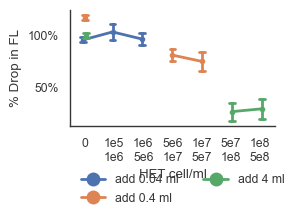

In [73]:

g = sns.catplot(
    data=df, # .loc[df['HET concentration'].gt(0)].reset_index(),
    #size='MED4 concentration',
    y='Relative FL',
    hue='Treatment',
    x='HET concentration binned',
    #palette=[gpalette_dict['Other'], 'black'],
    orient='x',
    kind='point', 
    #col='Treatment', #sharex=False, 
    #col_order=['add 0.04 ml', 'add 0.4 ml', 'add 4 ml', ],
    hue_order=['add 0.04 ml', 'add 0.4 ml', 'add 4 ml', ],
    height=2, aspect=1.5,
    errorbar="sd",dodge=0.1, lw=2,
    markersize=4, markeredgewidth=0,capsize=.2,
).set_titles(col_template='{col_name}') 
g.set(xlabel='HET cell/ml', ylabel='% Drop in FL')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# .set(xscale='log') # .set(ylim=(0,9)) #, xlim=(-1e7,2e8))
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.1), ncol=2, title=None, frameon=False,markerscale=1
)

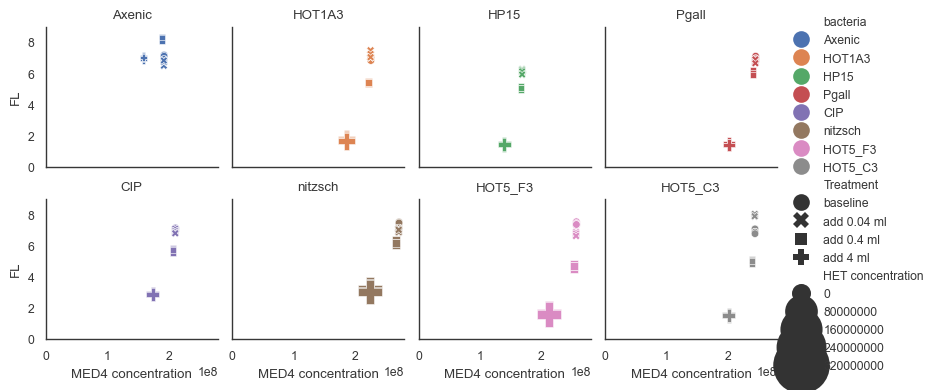

In [74]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='bacteria', col_wrap=4,

    height=2,
    sizes=(30,300),
).set(ylim=(0,9), xlim=(0,2.8e8)
).set_titles(col_template='{col_name}')


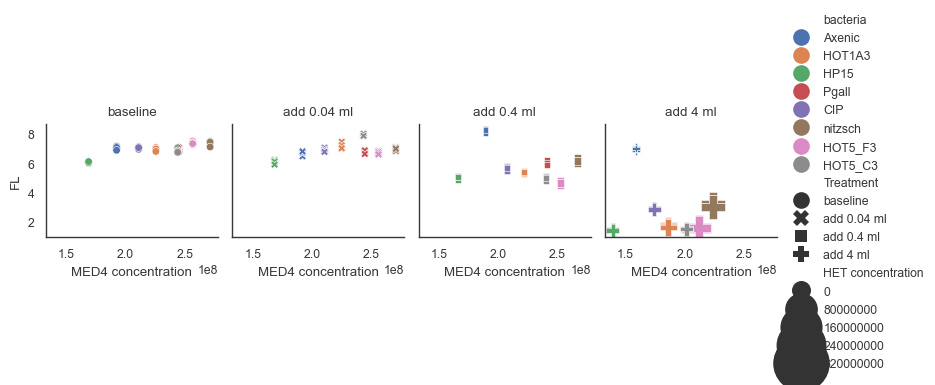

In [75]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='Treatment', 

    height=2,
    sizes=(30,300)
).set_titles(col_template='{col_name}')

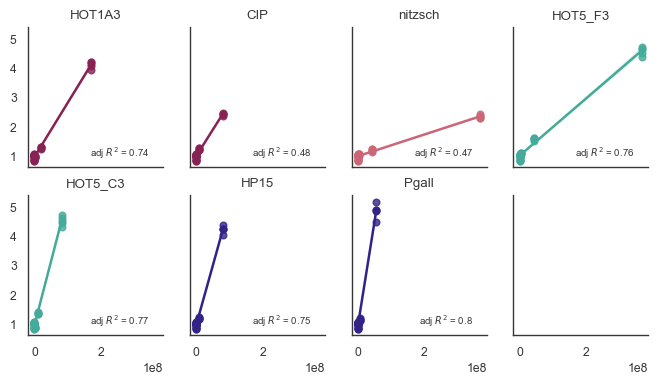

In [78]:
import statsmodels.api as sm
def _do_ols(i,color, ax):
    tmpdf = df.loc[df.bacteria.isin([i, 'Axenic'])]
    x= tmpdf['HET concentration']
    y= tmpdf['reference_baseline_FL'] / tmpdf['FL']
    model = sm.OLS(y, x)
    results = model.fit()
    # print()
    # print('*************************************************')
    # print(i)
    # print(results.summary())
    g= sns.regplot(ax=ax, x=x,y=y, color=color)
    g.set( title=i, xlabel='', ylabel='' )
    ax.text(0.9, 0.1, f'adj $R^2$ = {results.rsquared_adj:.2}', horizontalalignment='right',
     verticalalignment='center', transform=ax.transAxes, fontsize=7)
    #plt.show()
    return {
        'bacteria': i,
        'coef': results.params['HET concentration'], 
        'rsquared_adj' :results.rsquared_adj
    }    
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, frameon=False, figsize=(8,4))
sns.despine()
ols_df = pd.DataFrame([_do_ols(i,color, axes[int(j/4),j%4]) for j,(i,color) in enumerate(zip(horder, hpalette_g))])


In [40]:
ols_df.to_csv('het_shading_penalty.csv')